3. image classification model
obj-to learn about cnn and how to develop a cnn from image recognisation
A Convolutional Neural Network (CNN) is a type of deep neural network designed for tasks that involve analyzing and processing visual data, such as images and videos. CNNs are particularly well-suited for tasks like image classification, object detection, image segmentation, and more. They have become a fundamental component in computer vision and image analysis applications. Here are some key features and components of CNNs:

1. **Convolutional Layers:** The core building blocks of CNNs are convolutional layers. These layers apply a set of learnable filters (also known as kernels) to the input data. Each filter is a small matrix that slides or convolves across the input, computing element-wise multiplications and summing the results to produce feature maps. Convolutional layers are effective at capturing local patterns and features in the input data.

2. **Pooling (Subsampling) Layers:** Pooling layers reduce the spatial dimensions (width and height) of the feature maps obtained from convolutional layers. Common pooling operations include max-pooling and average-pooling. These operations help reduce the computational load and make the network more robust to small variations in the input.

3. **Activation Functions:** Activation functions, such as ReLU (Rectified Linear Unit), are applied after convolutional and pooling operations to introduce non-linearity into the network. This enables CNNs to learn complex and non-linear patterns in the data.

4. **Fully Connected Layers:** After one or more convolutional and pooling layers, CNNs often include one or more fully connected layers, similar to those in feedforward neural networks. These layers take the high-level features extracted by the convolutional layers and make final predictions based on these features.

5. **Flattening:** Before the fully connected layers, the feature maps are typically flattened into a one-dimensional vector, as fully connected layers require one-dimensional input.

6. **Output Layer:** The output layer of a CNN depends on the specific task. For image classification, it might consist of one neuron per class with a softmax activation function to produce probability scores for each class. For object detection, it may involve multiple neurons representing different object classes and bounding box coordinates.

7. **Training:** CNNs are trained using labeled data and optimization algorithms, such as gradient descent, to minimize a loss function. Backpropagation is used to adjust the network's weights and biases. Common loss functions for classification tasks include cross-entropy.

8. **Transfer Learning:** Transfer learning is often applied to CNNs. Pretrained CNN models, such as VGG, ResNet, or Inception, are fine-tuned on specific tasks. This approach can save training time and improve performance when you have limited data.

9. **Data Augmentation:** Data augmentation techniques are frequently used to artificially increase the size of the training dataset. These techniques involve creating variations of the input data through transformations like rotation, scaling, and flipping, which can help improve the model's generalization.

CNNs have had a significant impact in computer vision and have been applied to a wide range of applications, including image recognition, medical image analysis, self-driving cars, and more. Their ability to automatically learn hierarchical features from raw pixel data makes them powerful tools for visual data analysis.

In [2]:
import tensorflow as tf
print(tf.__version__)


2.10.1


In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD 
import numpy as np 
import random
import matplotlib.pyplot as plt

In [4]:
import os
os.environ['CUDA _VISIBLE DEVICES'] ='-1'

In [5]:
x_train = np.loadtxt('input.csv',delimiter =',')
y_train = np.loadtxt ('labels.csv',delimiter =',') 

In [6]:
x_test = np.loadtxt('input.csv', delimiter =',')
y_test = np.loadtxt('labels.csv', delimiter =',')

In [7]:
x_train = x_train.reshape (len (x_train), 100, 100, 3)
y_train = y_train.reshape (len(y_train), 1) 

In [8]:
x_test = x_test . reshape(len(x_test),100, 100,3)
y_test = y_test. reshape (len(y_test), 1)

In [9]:
x_train = x_train/255.0
x_test=x_test/255.0 

In [10]:
print("Shape of X_train:", x_train.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of X_train:", x_test.shape)
print("Shape of X_train:", y_test.shape) 


Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_train: (2000, 100, 100, 3)
Shape of X_train: (2000, 1)


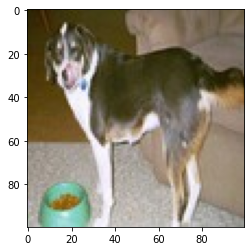

In [11]:
idx = random.randint(0, len(x_train)) 
plt.imshow(x_train[idx, :]) 
plt.show() 

In [12]:
from tensorflow.keras.layers import BatchNormalization

In [13]:
model = Sequential([
        Conv2D(256, (3,3) , activation = 'relu', input_shape=(100, 100, 3)), 
        BatchNormalization(),
        MaxPooling2D((4, 4)), Conv2D(128, (3,3), activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(1, activation='sigmoid') 
    ])

In [14]:
opt = SGD(momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy']) 

In [15]:
model.fit(x_train,y_train,epochs=10,batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
63/63 [==============================] - 107s 2s/step - loss: 0.7997 - accuracy: 0.5315 - val_loss: 0.6924 - val_accuracy: 0.5250
Epoch 2/10
63/63 [==============================] - 121s 2s/step - loss: 0.6595 - accuracy: 0.6265 - val_loss: 0.6830 - val_accuracy: 0.5460
Epoch 3/10
63/63 [==============================] - 109s 2s/step - loss: 0.5913 - accuracy: 0.6750 - val_loss: 0.6085 - val_accuracy: 0.6785
Epoch 4/10
63/63 [==============================] - 103s 2s/step - loss: 0.5648 - accuracy: 0.7105 - val_loss: 1.4217 - val_accuracy: 0.5050
Epoch 5/10
63/63 [==============================] - 107s 2s/step - loss: 0.5551 - accuracy: 0.7300 - val_loss: 0.6249 - val_accuracy: 0.6445
Epoch 6/10
63/63 [==============================] - 101s 2s/step - loss: 0.4786 - accuracy: 0.7690 - val_loss: 0.4900 - val_accuracy: 0.7560
Epoch 7/10
63/63 [==============================] - 107s 2s/step - loss: 0.4519 - accuracy: 0.7875 - val_loss: 0.4378 - val_accuracy: 0.7905
Epoch 8/10
63

In [16]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 18s 278ms/step - loss: 0.4292 - accuracy: 0.8010


[0.4291835427284241, 0.8009999990463257]

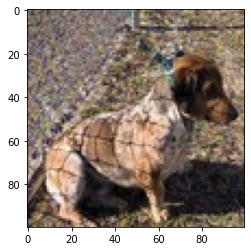

In [17]:
idx2 = random.randint(0, len(y_test)) 
plt.imshow(x_test [idx2, :]) 
plt.show()


In [18]:
y_pred=model.predict(x_test[idx2,:].reshape(1, 100,100, 3)) 
y_pred = y_pred>0.5
if(y_pred==0):
  pred='dog'
else:
  pred='cat'
print("Our model says it is a",pred) 

1/1 [==============================] - 1s 590ms/step
Our model says it is a dog


In [19]:
score=model.evaluate(x_test, y_test, verbose=0)
print ("Test Score: ", score[0]) 
print("Test accuracy: ", score[1]) 

Test Score:  0.4291835427284241
Test accuracy:  0.8009999990463257


In [20]:
model.summary () 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 256)      1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 128)      512       
 hNormalization)                                                 
                                                        

In [21]:
val = model.fit(x_train,y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
63/63 [==============================] - 114s 2s/step - loss: 0.2916 - accuracy: 0.8700 - val_loss: 0.2790 - val_accuracy: 0.8725
Epoch 2/5
63/63 [==============================] - 123s 2s/step - loss: 0.2529 - accuracy: 0.8965 - val_loss: 0.2936 - val_accuracy: 0.8800
Epoch 3/5
63/63 [==============================] - 125s 2s/step - loss: 0.2020 - accuracy: 0.9225 - val_loss: 0.1367 - val_accuracy: 0.9550
Epoch 4/5
63/63 [==============================] - 113s 2s/step - loss: 0.1754 - accuracy: 0.9285 - val_loss: 0.1131 - val_accuracy: 0.9685
Epoch 5/5
63/63 [==============================] - 112s 2s/step - loss: 0.1926 - accuracy: 0.9265 - val_loss: 0.1172 - val_accuracy: 0.9570


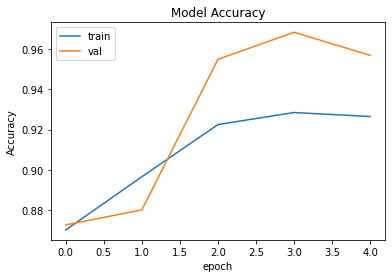

In [22]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('epoch') 
plt.plot(val.history['accuracy']) 
plt.plot(val.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()